In [ ]:
# General tools 
import pandas as pd
import numpy as np

# Plotting / viz 
import matplotlib.pyplot as plt

# Specialized packages 
from sklearn.decomposition import PCA     # viz n dimensions in 2d
from IPython.display import clear_output  # clearing graph output 

In [2]:
# Create dataframe 
df = pd.read_csv('unga_4625_cleaner.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'country_code', 'name', 'agreements_w_usa',
       'pct_agreement_w_usa', 'agreements_w_china', 'pct_agreement_w_china',
       'agreements_w_russia', 'pct_agreement_w_russia'],
      dtype='object')

In [ ]:
# Drop 'Unnamed' column
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
# Features for k-means
features = ['pct_agreement_w_usa',
                'pct_agreement_w_china',
                'pct_agreement_w_russia']


In [6]:
# Drop NaN values for k-means and create a features df
df = df.dropna(subset=features)
data = df[features].copy()

In [7]:
# Data is on a percentage scale, scaling would be unecessary 
# Creating random centriod positions 
def random_centroids (data, k): 
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample())) # random sample from data as float
        centroids.append(centroid)
    return pd.concat(centroids, axis=1) 

In [20]:
# defining k = 3
centroids = random_centroids(data, 3)

/var/folders/vy/kdp_qm9n34jdpdmqk1dtnc100000gn/T/ipykernel_59610/279356044.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample())) # random sample from data as float


In [21]:
# DataFrame of random centroids
centroids

,0,1,2
pct_agreement_w_usa,33.01,49.11,41.08
pct_agreement_w_china,81.77,83.52,75.03
pct_agreement_w_russia,57.96,55.54,30.83


In [22]:
# Finding distance between each datapoint and the centroids 
def get_labels (data, centroids): 
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [23]:
# Calling function to get initial labels for clusters 
lables = get_labels(data, centroids)

In [24]:
# value counts for each cluster 
lables.value_counts()

0    110
1     77
2     15
Name: count, dtype: int64

In [25]:
# Updating centroids based on cluster position 
# Calc geom mean to get new cluster centers 
def new_centroids (data, lables, k): 
    return data.groupby(lables).apply(
        lambda x: np.exp(np.log(x).mean())).T
    

In [26]:
# Plotting cluster assignments at each iteration of centroid repositioning 

def plot_clusters (data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration: {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()
    

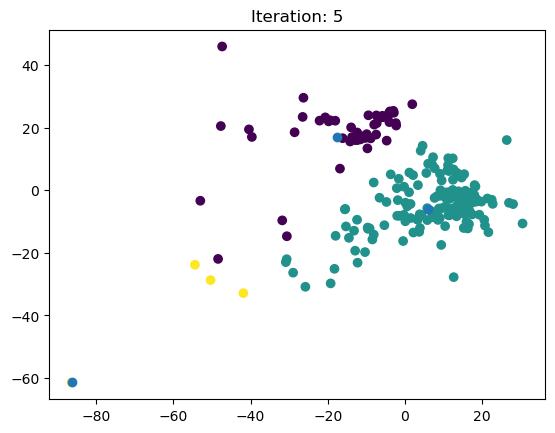

In [27]:
# Iteration loop 
max_iterations = 100 
k = 3

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [ ]:
# View centroids
centroids

,0,1,2
pct_agreement_w_usa,65.440460,39.235515,0.0
pct_agreement_w_china,55.139401,72.065261,0.0
pct_agreement_w_russia,60.213386,70.448014,0.0


In [ ]:
# View cluster 0
df[labels==0][['name']+ features]

,name,pct_agreement_w_usa,pct_agreement_w_china,pct_agreement_w_russia
3,ANDORRA,69.27,62.17,71.16
8,AUSTRALIA,65.26,57.79,59.43
9,AUSTRIA,63.57,58.73,64.79
12,BELGIUM,72.45,54.42,58.16
19,BOSNIA AND HERZEGOVINA,55.61,55.79,58.03
29,CANADA,71.95,54.49,55.80
30,SWITZERLAND,67.18,66.02,71.56
44,CZECHIA,70.76,64.13,73.48
46,GERMANY,70.13,63.09,72.65
49,DENMARK,68.02,58.43,62.68


In [ ]:
# View cluster 1
df[labels==1][['name']+ features]

,name,pct_agreement_w_usa,pct_agreement_w_china,pct_agreement_w_russia
0,AFGHANISTAN,35.94,70.81,72.50
1,ANGOLA,27.25,73.63,70.71
2,ALBANIA,35.61,58.65,60.48
4,UNITED ARAB EMIRATES,39.68,82.76,77.69
5,ARGENTINA,53.80,75.00,78.71
...,...,...,...,...
197,DEMOCRATIC YEMEN,29.76,75.03,86.46
198,YUGOSLAVIA,35.08,62.17,70.96
199,SOUTH AFRICA,29.49,47.53,39.44
200,ZAMBIA,39.64,78.57,76.05


In [ ]:
# View cluster 2
df[labels==2][['name']+ features]

,name,pct_agreement_w_usa,pct_agreement_w_china,pct_agreement_w_russia
48,DOMINICA,21.01,36.27,32.85
53,ZANZIBAR,0.00,0.00,0.00
96,KIRIBATI,32.33,28.91,25.00
164,SOUTH SUDAN,26.15,28.62,29.65


In [ ]:
# New DataFrames of name, code and feature 
cl0 = df[labels==0][['name', 'country_code']+ features]
cl1 = df[labels==1][['name', 'country_code']+ features]
cl2 = df[labels==2][['name', 'country_code']+ features]

In [ ]:
# Add cluster column to each DataFrame
cl0['cluster'] = 0
cl1['cluster'] = 1
cl2['cluster'] = 2

In [ ]:
# Checking cluster 1 df for formatting
cl1

,name,country_code,pct_agreement_w_usa,pct_agreement_w_china,pct_agreement_w_russia,cluster
0,AFGHANISTAN,AFG,35.94,70.81,72.50,1
1,ANGOLA,AGO,27.25,73.63,70.71,1
2,ALBANIA,ALB,35.61,58.65,60.48,1
4,UNITED ARAB EMIRATES,ARE,39.68,82.76,77.69,1
5,ARGENTINA,ARG,53.80,75.00,78.71,1
...,...,...,...,...,...,...
197,DEMOCRATIC YEMEN,YMD,29.76,75.03,86.46,1
198,YUGOSLAVIA,YUG,35.08,62.17,70.96,1
199,SOUTH AFRICA,ZAF,29.49,47.53,39.44,1
200,ZAMBIA,ZMB,39.64,78.57,76.05,1


In [ ]:
# Concatenate all data into 1 DataFrame
df_clustered = pd.concat([cl0, cl1, cl2])

In [ ]:
# View concatenated DataFrame
df_clustered

,name,country_code,pct_agreement_w_usa,pct_agreement_w_china,pct_agreement_w_russia,cluster
3,ANDORRA,AND,69.27,62.17,71.16,0
8,AUSTRALIA,AUS,65.26,57.79,59.43,0
9,AUSTRIA,AUT,63.57,58.73,64.79,0
12,BELGIUM,BEL,72.45,54.42,58.16,0
19,BOSNIA AND HERZEGOVINA,BIH,55.61,55.79,58.03,0
...,...,...,...,...,...,...
201,ZIMBABWE,ZWE,31.95,79.80,74.04,1
48,DOMINICA,DMA,21.01,36.27,32.85,2
53,ZANZIBAR,EAZ,0.00,0.00,0.00,2
96,KIRIBATI,KIR,32.33,28.91,25.00,2


In [ ]:
# Add period column to concatenated DataFrame
df_clustered['period'] = '1946-2025'

In [ ]:
# View concatenated data
df_clustered

,name,country_code,pct_agreement_w_usa,pct_agreement_w_china,pct_agreement_w_russia,cluster,period
3,ANDORRA,AND,69.27,62.17,71.16,0,1946-2025
8,AUSTRALIA,AUS,65.26,57.79,59.43,0,1946-2025
9,AUSTRIA,AUT,63.57,58.73,64.79,0,1946-2025
12,BELGIUM,BEL,72.45,54.42,58.16,0,1946-2025
19,BOSNIA AND HERZEGOVINA,BIH,55.61,55.79,58.03,0,1946-2025
...,...,...,...,...,...,...,...
201,ZIMBABWE,ZWE,31.95,79.80,74.04,1,1946-2025
48,DOMINICA,DMA,21.01,36.27,32.85,2,1946-2025
53,ZANZIBAR,EAZ,0.00,0.00,0.00,2,1946-2025
96,KIRIBATI,KIR,32.33,28.91,25.00,2,1946-2025


In [ ]:
# Save data to csv
df_clustered.to_csv('clustered_unga4625_3.csv')